Medical AI Validation Tools

1. SURVIVAL ANALYSIS - Kaplan-Meier Curves
--------------------------------------------------


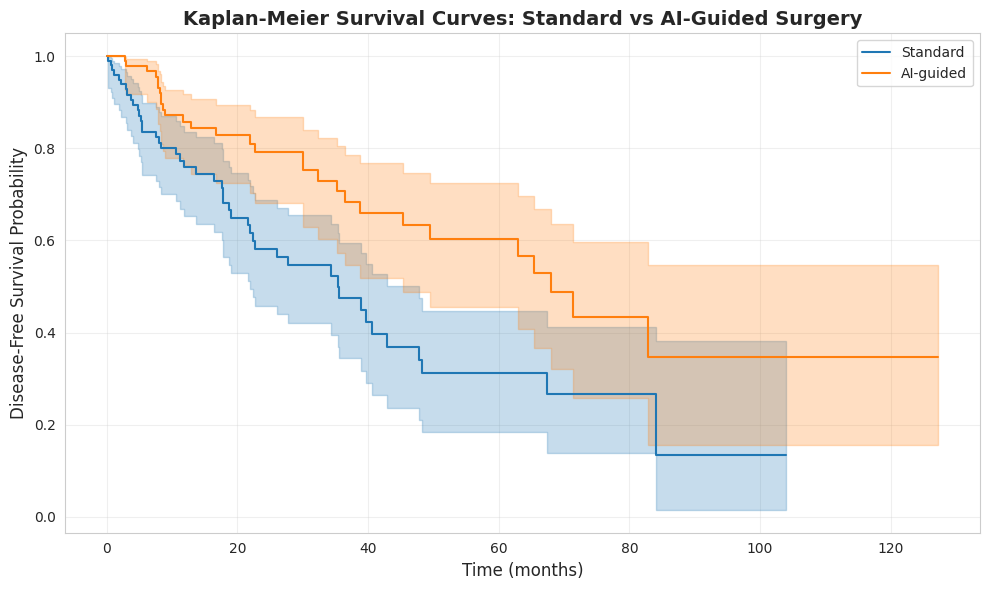

Median DFS - Standard: 35.4 months
Median DFS - AI-guided: 67.9 months

2. MODEL CALIBRATION ANALYSIS
--------------------------------------------------


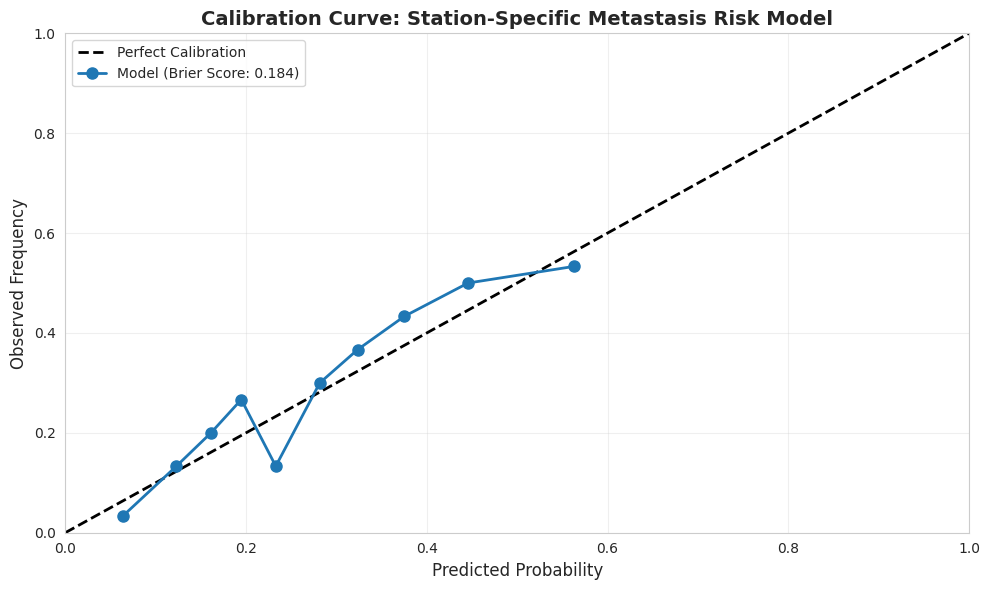


Brier Score: 0.1843
(Lower is better; 0 = perfect, 0.25 = uninformative)
Expected Calibration Error (ECE): 0.0455
(Target for surgical AI: ECE ≤ 0.05)

3. SUMMARY STATISTICS
--------------------------------------------------
Total patients analyzed: 300
Mean predicted risk: 0.276
Observed event rate: 0.290
Calibration quality: Good

Analysis complete! See generated plots:
  - kaplan_meier_example.png
  - calibration_curve_example.png


In [5]:
"""
Medical AI Validation: Survival Analysis and Calibration
Author: Maximilian Herbert Dressler
Purpose: Demonstrate basic survival analysis and model calibration techniques relevant for surgical AI validation research

"""

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Medical AI Validation Tools")
print("=" * 50)

# ============================================
# PART 1: SURVIVAL ANALYSIS (KAPLAN-MEIER)
# ============================================

print("\n1. SURVIVAL ANALYSIS - Kaplan-Meier Curves")
print("-" * 50)

# Create synthetic data mimicking gastric cancer patients
np.random.seed(42)
n_patients = 200

# Simulate two groups: standard surgery vs AI-guided surgery
data = pd.DataFrame({
    'patient_id': range(1, n_patients + 1),
    'group': ['Standard'] * 100 + ['AI-guided'] * 100,
    'time_months': np.concatenate([
        np.random.exponential(24, 100),  # Standard group
        np.random.exponential(30, 100)   # AI-guided group (better outcomes)
    ]),
    'event': np.concatenate([
        np.random.binomial(1, 0.4, 100),  # 40% event rate
        np.random.binomial(1, 0.3, 100)   # 30% event rate (better)
    ])
})

# Fit Kaplan-Meier curves for each group
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))
for group in ['Standard', 'AI-guided']:
    group_data = data[data['group'] == group]
    kmf.fit(group_data['time_months'], 
            group_data['event'], 
            label=group)
    kmf.plot_survival_function()

plt.xlabel('Time (months)', fontsize=12)
plt.ylabel('Disease-Free Survival Probability', fontsize=12)
plt.title('Kaplan-Meier Survival Curves: Standard vs AI-Guided Surgery', 
          fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('kaplan_meier_example.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate median survival times
for group in ['Standard', 'AI-guided']:
    group_data = data[data['group'] == group]
    kmf.fit(group_data['time_months'], group_data['event'])
    median = kmf.median_survival_time_
    print(f"Median DFS - {group}: {median:.1f} months")

# ============================================
# PART 2: MODEL CALIBRATION
# ============================================

print("\n2. MODEL CALIBRATION ANALYSIS")
print("-" * 50)

# Simulate a risk prediction model
# True probabilities (what actually happened)
np.random.seed(42)
n_samples = 300

# Simulate predicted probabilities from a model
predicted_probs = np.random.beta(2, 5, n_samples)  # Model predictions

# Simulate true outcomes (with some relationship to predictions)
true_outcomes = np.random.binomial(1, predicted_probs * 1.2)  # Slightly miscalibrated
true_outcomes = np.minimum(true_outcomes, 1)  # Cap at 1

# Calculate calibration curve
fraction_of_positives, mean_predicted_value = calibration_curve(
    true_outcomes, predicted_probs, n_bins=10, strategy='quantile'
)

# Calculate Brier score
brier_score = brier_score_loss(true_outcomes, predicted_probs)

# Plot calibration curve
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration', linewidth=2)
plt.plot(mean_predicted_value, fraction_of_positives, 'o-', 
         label=f'Model (Brier Score: {brier_score:.3f})',
         linewidth=2, markersize=8)

plt.xlabel('Predicted Probability', fontsize=12)
plt.ylabel('Observed Frequency', fontsize=12)
plt.title('Calibration Curve: Station-Specific Metastasis Risk Model', 
          fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.tight_layout()
plt.savefig('calibration_curve_example.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nBrier Score: {brier_score:.4f}")
print("(Lower is better; 0 = perfect, 0.25 = uninformative)")

# Calculate Expected Calibration Error (ECE)
ece = np.mean(np.abs(fraction_of_positives - mean_predicted_value))
print(f"Expected Calibration Error (ECE): {ece:.4f}")
print("(Target for surgical AI: ECE ≤ 0.05)")

# ============================================
# PART 3: SUMMARY STATISTICS
# ============================================

print("\n3. SUMMARY STATISTICS")
print("-" * 50)
print(f"Total patients analyzed: {n_samples}")
print(f"Mean predicted risk: {predicted_probs.mean():.3f}")
print(f"Observed event rate: {true_outcomes.mean():.3f}")
print(f"Calibration quality: {'Good' if ece <= 0.05 else 'Needs improvement'}")

print("\n" + "=" * 50)
print("Analysis complete! See generated plots:")
print("  - kaplan_meier_example.png")
print("  - calibration_curve_example.png")